## New York Airbnb Rental Analysis

# Introduction

In recent years, the B&B industry has become an increasingly large part of the tourism industry. The rise of platforms such as Airbnb has become a strong competitor to the traditional hotel industry. In Taiwan, for example, as people's travel habits and values have changed in recent years, B&Bs have begun to grow explosively, and in 2018 alone, the vast majority of the 3,362 new hotels were B&Bs (Chien-Chung Yu, et al., 2020).

The development of B&Bs profoundly affects the tourism industry and even social patterns in cities. In urban and rural areas, tourists can have a more seamless interaction with local communities and a more local experience by staying at a B&B. At the same time, local communities interact with foreign tourists and undoubtedly increase equality between tourists and local residents, promoting bonds between communities (Emeka Ndaguba, et al., 2023).

The rental rates of B&Bs are influenced by various factors, including the city's location and the type of accommodation. For instance, there can be a twofold difference in the average daily rent of B&Bs between Tallinn and Bucharest, highlighting the significant impact of geographic location on pricing in different cities in Central and Eastern Europe (Łukasz Mach, 2020). Therefore, landlords need to consider these relevant elements to formulate a scientific and effective pricing strategy, emphasizing the importance of thoughtful consideration in this aspect.

Therefore, this REPORT attempts to summarise by analysing more than 20,000 airbnb B&Bs in New York City:<br>
-Visualise the distribution density of B&Bs in different areas in New York;<br>
-The impact of different elements (e.g., location, frequency of customer reviews, room type, etc.) on B&B pricing;<br>
-The training of a suitable model for predicting B&B prices, which can help landlords develop effective pricing strategies.

# Data

This dataset provides an unique and comprehensive view of the Airbnb industry in New York City. This data describes some crucial parameter related to over 20,000 Airbnbs in New York City in 2019, including "host name, neighborhood group, location (latitude/longitude coordinates), room type, price per night, minimum nights required to book a stay at this listing, total number of reviews and ratings received by guests over time (including reviews per month and last review date), calculated host listing count (indicates how many listings are offered by each host) along with 365 days worth of availability score". This data will offer valuable insights for professionals in the relevant market to analyze trends in the Airbnb market (Kaggle, 2023).

The data can be obtained on [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data), and the original source can be found on this [website](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data). This public dataset is part of Airbnb.

With all these parameters we can visualise the distribution of Airbnbs in New York, understand the correlation between the price of B&B rentals and other attributes of those Airbnbs, and then derive a model of B&B prices through classification. This facilitates a clearer study of the supply relationship of B&Bs.

# Statistics and Visualisation

Import the basic packages:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd

Load in and view the New York Airbnb data:

In [34]:
bnbs = pd.read_csv('AB_NYC_2019.csv') #Load in the data
bnbs.head() #View

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
bnbs.describe() #Describe the data

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [36]:
bnbs.dtypes #View the data type of each column

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The columns of the data represent the following:<br>
-id: The id of the Airbnb listing. (Integer)<br>
-name: The name of the Airbnb listing. (String)<br>
-host_id: The id of the host of the Airbnb listing. (Integer)<br>
-host_name: The name of the host of the Airbnb listing. (String)<br>
-neighbourhood_group: The neighbourhood group the Airbnb listing is located in. (String)<br>
-latitude: The latitude coordinate of the Airbnb listing. (Float)<br>
-longitude: The longitude coordinate of the Airbnb listing. (Float)<br>
-room_type: The type of room offered by the Airbnb listing. (String)<br>
-price: The price per night of the Airbnb listing. (Integer)<br>
-minimum_nights: The minimum number of nights required for booking the Airbnb listing. (Integer)<br>
-number_of_reviews: The total number of reviews the Airbnb listing has received. (Integer)<br>
-last_review: The date of the last review the Airbnb listing has received. (Date)<br>
-reviews_per_month: The average number of reviews the Airbnb listing receives per month. (Float)<br>
-calculated_host_listings_count: The total number of listings the host has. (Integer)<br>
-availability_365: The number of days the Airbnb listing is available for booking in a year. (Integer)<br>

Count the values of different neighbourhood group.

In [37]:
bnbs['neighbourhood_group'].value_counts() 

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Most Airbnbs are located in Manhattan & Brooklyn, with Manhattan Airbnbs having the highest number at 21,661.

Creat a boxplot of prices of the listings.

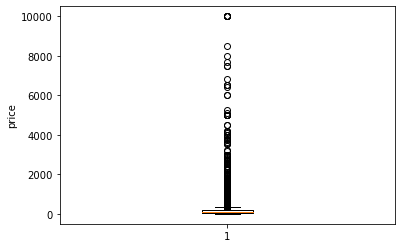

In [38]:
#boxplot
plt.boxplot(bnbs['price'])
plt.ylabel('price')
plt.show()

Obviously, such a distribution of prices is not conducive to data analysis, so we need to eliminate the exceptional values with prices greater than 300 to make our conclusions more general.

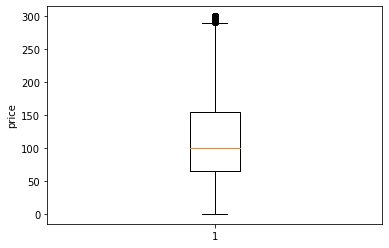

In [39]:
bnbs_price_less_300 = bnbs[bnbs['price']<=300] #eliminate the outliers
plt.boxplot(bnbs_price_less_300['price'])
plt.ylabel('price')
plt.show()

Now, we are making a histogram of the price of the B&Bs. 

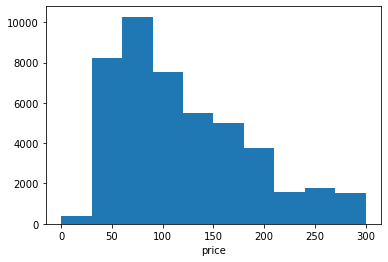

In [40]:
#histogram
plt.hist(bnbs_price_less_300['price'])
plt.xlabel('price')
plt.show()

Apparently, the nightly rents for New York airbnbs that spread out in the 50-100 range are the most.

Next, the box plot is able to give different rent distributions for different areas and room types in New York.

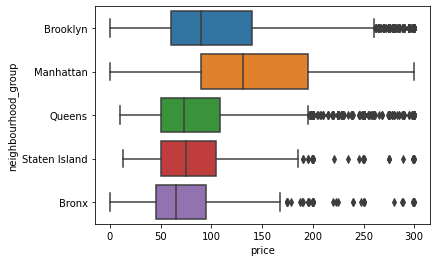

In [41]:
#boxplot of price distribution in the 5 boroughs
fig = sns.boxplot(data = bnbs_price_less_300, y = "neighbourhood_group", x = "price") 
plt.show()

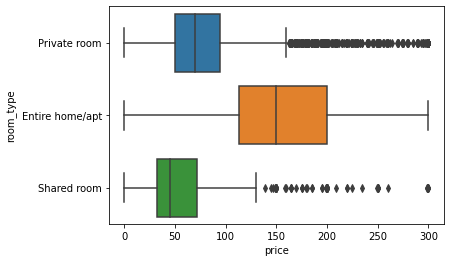

In [42]:
#boxplot of price distribution of different room type
fig = sns.boxplot(data = bnbs_price_less_300, y = "room_type", x = "price") 
plt.show()

The box plot clearly shows that Manhattan has the highest rents compared to the other four boroughs. 'Entire home/apt' has the highest rent compared to other room types.

Next, we will check the distribution of the Airbnbs in New York with map. First, load in the .shp file from <https://opendata.cityofnewyork.us>.

In [43]:
New_York = gpd.read_file('geo_export_de8162dc-c3f8-4edb-806e-b3442a6cd410.shp')

In [44]:
# View the spatial data.
New_York

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


The data contians the codes of five boroughs in New York city, their names, areas, lengths of the shapes. Points of the multipolygon in order are shown in the geometry column.

<AxesSubplot:>

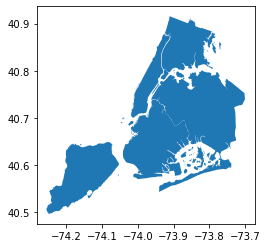

In [45]:
# plot the New York data
New_York.plot()


<AxesSubplot:>

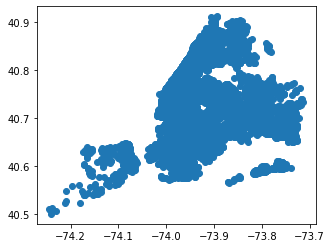

In [46]:
# create and plot the geodataframe of each bnb
bnbsloc = gpd.GeoDataFrame(bnbs_price_less_300, geometry=gpd.points_from_xy(bnbs_price_less_300['longitude'], bnbs_price_less_300['latitude']))
bnbsloc.plot()

Text(0.5, 0.98, 'Distribution of bnbs in New York')

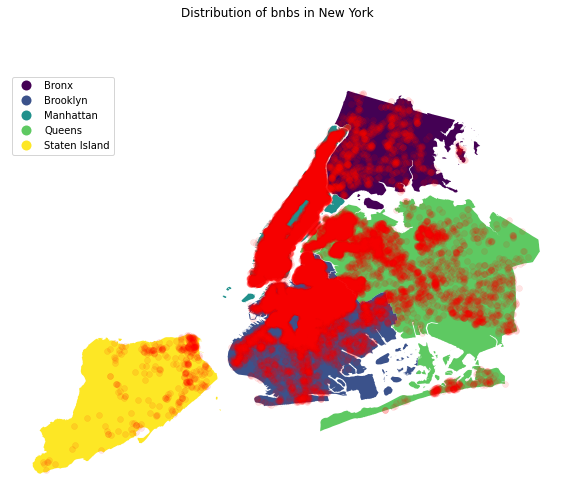

In [47]:
# plot the both spatial files together
fig, ax = plt.subplots(1,1, figsize = (10,8), ) 
New_York.plot(ax = ax, linewidth = 0.2, column='boro_name', legend = True, cmap = 'viridis')
bnbsloc.plot(ax = ax, color = '#FF0000', linewidth = 0.5, alpha = 0.1)
ax.set_axis_off()
fig.suptitle('Distribution of bnbs in New York')

From the above picture we can visualise the distribution and density comparison of airbnb in New York, with Manhattan and the west side of Brooklyn having the highest density, while other areas are relatively low, with Staten Island having the lowest density of airbnbs.

Text(0.5, 0.98, 'Distribution of bnbs by price in New York')

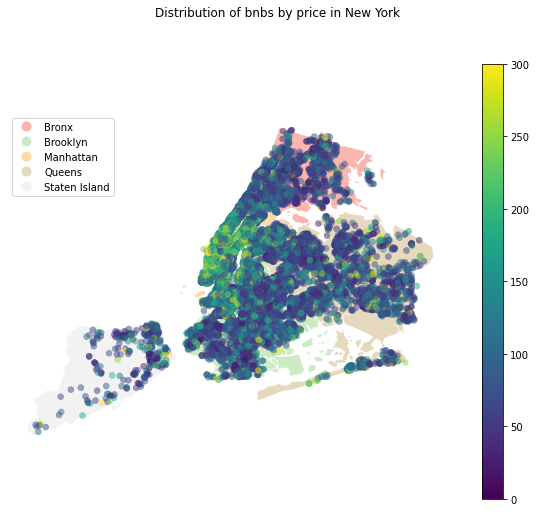

In [48]:
# we can add the attribute of the price into this picture
fig, ax = plt.subplots(1,1, figsize = (10,8), ) 
New_York.plot(ax = ax, linewidth = 0.2, column = 'boro_name', legend = True, cmap='Pastel1')
bnbsloc.plot(ax = ax, column = 'price', linewidth = 0.5, alpha = 0.5, legend = True, label = 'price')
ax.set_axis_off()
fig.suptitle('Distribution of bnbs by price in New York')

It is obvious that airbnb rentals around Manhattan are the most expensive.

# Data Wrangling

In order to make the conclusions of the data analysis more general, besides eliminating the B&Bs with abnormal rents, it is also necessary to eliminate the B&Bs with too low a number of ratings and availability.

In [49]:
bnbs_price_less_300 = bnbs_price_less_300[bnbs_price_less_300['number_of_reviews']>=1]
bnbs_price_less_300 = bnbs_price_less_300[bnbs_price_less_300['availability_365']>=2]
bnbs_price_less_300.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


Also, to enhance accuracy of analysis, certain variables require recoding.

In [50]:
#Recode the object variables in the 'neighbourhood_group' and 'room_type' colunms.
bnbs_price_less_300['Brooklyn_bin'] = np.where(bnbs_price_less_300['neighbourhood_group'] == "Brooklyn", 1, 0)
bnbs_price_less_300['Manhattan_bin'] = np.where(bnbs_price_less_300['neighbourhood_group'] == "Manhattan", 1, 0)
bnbs_price_less_300['Queens_bin'] = np.where(bnbs_price_less_300['neighbourhood_group'] == "Queens", 1, 0)
bnbs_price_less_300['Bronx_bin'] = np.where(bnbs_price_less_300['neighbourhood_group'] == "Bronx", 1, 0)
bnbs_price_less_300['Staten_Island _bin'] = np.where(bnbs_price_less_300['neighbourhood_group'] == "Staten Island", 1, 0)
bnbs_price_less_300['Entire_home/apt_bin'] = np.where(bnbs_price_less_300['room_type'] == "Entire home/apt", 1, 0)
bnbs_price_less_300['Private_room_bin'] = np.where(bnbs_price_less_300['room_type'] == "Private room", 1, 0)
bnbs_price_less_300['Shared_room_bin'] = np.where(bnbs_price_less_300['room_type'] == "Shared room", 1, 0)
bnbs_price_less_300.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,Brooklyn_bin,Manhattan_bin,Queens_bin,Bronx_bin,Staten_Island _bin,Entire_home/apt_bin,Private_room_bin,Shared_room_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,1,0,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,1,0,0,0,0,1,0,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,1,129,0,1,0,0,0,1,0,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,1,220,0,1,0,0,0,0,1,0


Similarly, to facilitate the creation of the model, we simplified the different price ranges into 7 different classes with split points set every 50.

In [51]:
#Create a new "price_level" column representing the price range.
bnbs_price_less_300['price_level'] = pd.cut(bnbs_price_less_300['price'], bins=range(0, 351, 50), labels=range(1, 8))
bnbs_price_less_300.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,Brooklyn_bin,Manhattan_bin,Queens_bin,Bronx_bin,Staten_Island _bin,Entire_home/apt_bin,Private_room_bin,Shared_room_bin,price_level
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,365,1,0,0,0,0,0,1,0,3
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,355,0,1,0,0,0,1,0,0,5
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,194,1,0,0,0,0,1,0,0,2
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,129,0,1,0,0,0,1,0,0,4
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,220,0,1,0,0,0,0,1,0,2


In [52]:
bnbs_wrangling = bnbs_price_less_300[['minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365',
                  'Brooklyn_bin','Manhattan_bin','Queens_bin','Bronx_bin','Staten_Island _bin',
                  'Entire_home/apt_bin','Private_room_bin','Shared_room_bin','price']]

In [53]:
bnbs_wrangling.corr()

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Brooklyn_bin,Manhattan_bin,Queens_bin,Bronx_bin,Staten_Island _bin,Entire_home/apt_bin,Private_room_bin,Shared_room_bin,price
minimum_nights,1.000000,-0.173289,0.077868,0.091401,-0.034115,0.083949,-0.051966,-0.021711,-0.018198,0.092019,-0.086223,-0.018047,0.018959
reviews_per_month,-0.173289,1.000000,-0.062975,-0.070255,-0.034681,-0.048302,0.103688,0.018686,0.006564,-0.037547,0.040913,-0.010256,-0.069512
calculated_host_listings_count,0.077868,-0.062975,1.000000,0.158237,-0.108998,0.152030,-0.040523,-0.025529,-0.015228,0.095060,-0.093263,-0.005759,0.144921
availability_365,0.091401,-0.070255,0.158237,1.000000,-0.041524,-0.032267,0.067622,0.040874,0.048026,-0.058265,0.039600,0.057530,0.012711
Brooklyn_bin,-0.034115,-0.034681,-0.108998,-0.041524,1.000000,-0.680527,-0.352739,-0.151217,-0.093234,-0.010411,0.019317,-0.027358,-0.123540
Manhattan_bin,0.083949,-0.048302,0.152030,-0.032267,-0.680527,1.000000,-0.333191,-0.142837,-0.088067,0.108618,-0.110119,0.004348,0.317613
Queens_bin,-0.051966,0.103688,-0.040523,0.067622,-0.352739,-0.333191,1.000000,-0.074037,-0.045648,-0.108827,0.101349,0.023259,-0.190912
Bronx_bin,-0.021711,0.018686,-0.025529,0.040874,-0.151217,-0.142837,-0.074037,1.000000,-0.019569,-0.050417,0.042738,0.023732,-0.119644
Staten_Island _bin,-0.018198,0.006564,-0.015228,0.048026,-0.093234,-0.088067,-0.045648,-0.019569,1.000000,-0.005549,0.008445,-0.008890,-0.052927
Entire_home/apt_bin,0.092019,-0.037547,0.095060,-0.058265,-0.010411,0.108618,-0.108827,-0.050417,-0.005549,1.000000,-0.947150,-0.164951,0.630551


# Data Analysis

## Creating Training and Teat Dataset

Creat the lable dataset.

In [54]:
le = LabelEncoder() # Create the LabelEncoder object.
labels_fea = le.fit_transform(bnbs_price_less_300['price_level']) 
labels_fea

array([2, 4, 1, ..., 0, 4, 1], dtype=int64)

We now create a subset of the data which includes the predictors that have relations with the prive level.

In [55]:
bnbs_sub = bnbs_price_less_300[['minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365',
                  'Brooklyn_bin','Manhattan_bin','Queens_bin','Bronx_bin','Staten_Island _bin',
                  'Entire_home/apt_bin','Private_room_bin','Shared_room_bin']]
bnbs_sub.head()

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Brooklyn_bin,Manhattan_bin,Queens_bin,Bronx_bin,Staten_Island _bin,Entire_home/apt_bin,Private_room_bin,Shared_room_bin
0,1,0.21,6,365,1,0,0,0,0,0,1,0
1,1,0.38,2,355,0,1,0,0,0,1,0,0
3,1,4.64,1,194,1,0,0,0,0,1,0,0
5,3,0.59,1,129,0,1,0,0,0,1,0,0
7,2,3.47,1,220,0,1,0,0,0,0,1,0


In order to split it, we also need our dataset to be in an array

In [56]:
bnbs_array = bnbs_sub.to_numpy()
bnbs_array

array([[1.  , 0.21, 6.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 0.38, 2.  , ..., 1.  , 0.  , 0.  ],
       [1.  , 4.64, 1.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 6.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 2.  , 1.  , ..., 1.  , 0.  , 0.  ]])

Divide them into training and test data and labels:

In [57]:
train_data, test_data, train_lab, test_lab = train_test_split(bnbs_array, labels_fea)

Check the length of all arrays, train_test_split will split the data according to a 75:25 split.

In [58]:
len(train_data)

17992

In [59]:
len(test_data)

5998

In [60]:
len(train_lab)

17992

In [61]:
len(test_lab)

5998

## K-nearest Neighbors

We first train and test the price intervals using the *k*-Nearest Neighbour (*k*NN) classifier.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#creat the classifer with 10 neighbors
knn = KNeighborsClassifier(n_neighbors = 10) 

In [64]:
#fit the classifier
knn.fit(train_data, train_lab)

KNeighborsClassifier(n_neighbors=10)

In [65]:
#print the score
knn.score(test_data, test_lab)

0.41430476825608537

In [66]:
predictions = knn.predict(test_data)
from sklearn import metrics
#add the test labels and the predictions to create the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

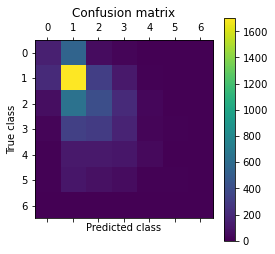

In [67]:
#plots the confusion matrix
plt.matshow(confusion_matrix) 
plt.colorbar() 
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [68]:
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.32      0.19      0.24       780
           1       0.50      0.72      0.59      2355
           2       0.32      0.30      0.31      1348
           3       0.26      0.20      0.23       847
           4       0.36      0.11      0.17       397
           5       0.29      0.03      0.06       270
           6       0.00      0.00      0.00         1

    accuracy                           0.41      5998
   macro avg       0.29      0.22      0.23      5998
weighted avg       0.38      0.41      0.38      5998



## Decision Trees

We now try the Decision Tree method.

In [69]:
#import the package
from sklearn.tree import DecisionTreeClassifier

In [70]:
#create a DecisionTreeClassifer and give it a name.
dt = DecisionTreeClassifier()
#fit the model
dt.fit(train_data, train_lab)
#check the score
dt.score(test_data, test_lab)

0.3924641547182394

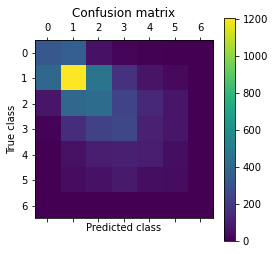

In [71]:
#predict and create the confusion matrix
predictions = dt.predict(test_data)
reviews_pred = pd.DataFrame(list(predictions))
confusion_matrix = metrics.confusion_matrix(test_lab, reviews_pred)
#plot the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [72]:
#print the results
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.40      0.43      0.41       780
           1       0.54      0.51      0.53      2355
           2       0.32      0.32      0.32      1348
           3       0.29      0.31      0.30       847
           4       0.20      0.23      0.21       397
           5       0.15      0.15      0.15       270
           6       0.00      0.00      0.00         1

    accuracy                           0.39      5998
   macro avg       0.27      0.28      0.27      5998
weighted avg       0.40      0.39      0.39      5998



## Random Forests

For Random Forest classifier, we need to specify the `n_estimators`. The larger this value is, the greater the processing time and accuracy will be.

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest=RandomForestClassifier(n_estimators=10)
forest.fit(train_data,train_lab)
forest.score(test_data, test_lab)

0.4558186062020674

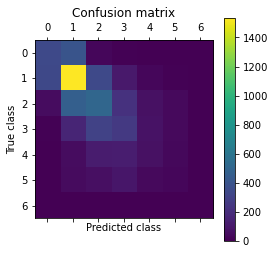

In [75]:
#predict and creat the matrix
predictions = forest.predict(test_data)
reviews_pred = pd.DataFrame(list(predictions))
confusion_matrix = metrics.confusion_matrix(test_lab, reviews_pred)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [76]:
#print the results
print(metrics.classification_report(test_lab, predictions, zero_division =0))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       780
           1       0.58      0.65      0.61      2355
           2       0.37      0.38      0.37      1348
           3       0.32      0.30      0.31       847
           4       0.24      0.17      0.20       397
           5       0.19      0.10      0.13       270
           6       0.00      0.00      0.00         1

    accuracy                           0.46      5998
   macro avg       0.31      0.29      0.30      5998
weighted avg       0.44      0.46      0.45      5998



## Naive Bayes

Next, we will try the Naive Bayes.

In [77]:
#import the package
from sklearn.naive_bayes import GaussianNB

In [78]:
NB = GaussianNB()
#fit the classifer
NB.fit(train_data,train_lab)
#check the score
NB.score(test_data, test_lab)

0.25258419473157717

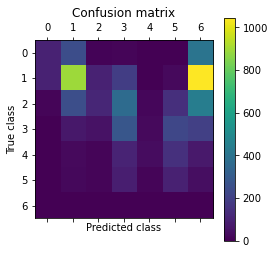

In [79]:
#predict
predictions = NB.predict(test_data)
#add the predictions to a new dataframe
reviews_pred = pd.DataFrame(list(predictions))
#create the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, reviews_pred)
#plot the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [80]:
#print the results
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.46      0.13      0.20       780
           1       0.59      0.38      0.46      2355
           2       0.37      0.08      0.14      1348
           3       0.27      0.33      0.30       847
           4       0.36      0.09      0.14       397
           5       0.15      0.35      0.21       270
           6       0.00      1.00      0.00         1

    accuracy                           0.25      5998
   macro avg       0.31      0.34      0.21      5998
weighted avg       0.44      0.25      0.30      5998



## The Perceptron

Finally, we use the Perceptron to fit the model.

In [81]:
from sklearn.neural_network import MLPClassifier
#we will use the standard parameters
Perceptron = MLPClassifier()
Perceptron.fit(train_data,train_lab)
Perceptron.score(test_data, test_lab)

0.4808269423141047

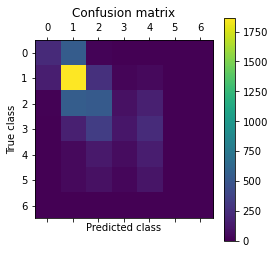

In [82]:
predictions = Perceptron.predict(test_data)
reviews_pred = pd.DataFrame(list(predictions))
confusion_matrix = metrics.confusion_matrix(test_lab, reviews_pred)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [83]:
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       780
           1       0.58      0.79      0.67      2355
           2       0.39      0.39      0.39      1348
           3       0.36      0.13      0.20       847
           4       0.22      0.39      0.28       397
           5       0.40      0.01      0.01       270
           6       0.00      0.00      0.00         1

    accuracy                           0.48      5998
   macro avg       0.36      0.28      0.27      5998
weighted avg       0.47      0.48      0.45      5998



# Results

The models were trained differently using the five different methods, and different scores were given out, as shown in the table below:

| K-nearest Neighbors | Decision Trees | Random Forest | Naive Bayes | The Perceptron |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| 0.41 | 0.39 | 0.46 | 0.25 | 0.49 |

Overall, the Perceptron method has the highest score meaning that 49% of the data in the test set were predicted accurately in the actual price level.

It can also be concluded from the matrix and report that the KKN method has the highest accuracy in predicting bnbs with a price level of 2, i.e., daily rentals in the range of 50-100. The overall score of the Decision Tree is not as good as the knn method, but it is more accurate in predicting the first price level at 0.40. While the Random Forest has a more accurate score and precision based on the matrix and the report.

Navie Baye is the least accurate, as can be seen from the matrix, signidicant level 2 values are predicted as level 7. As for the Perceptron method with standard parameters, it has the highest accuracy in predicting the price levels, and has the highest precision on the first price level, which is 0.55.

# Discussion

By converting the geometries of the dataset into the maps and adding price attribute into the points, the maps in the visualisation section allow us to visualise the relationship between the density, the rent and the location of B&B distribution.

According to the boxplot and corelation tables in the statistics and visualisation part, there is a correlation between the nightly rent in airbnb and the location, type of housing and other factors. These factors are also taken into account in the actual pricing of the rent. According to Data Analysis, the model built by the Perceptron method is more accurate in predicting the price level of B&Bs because of the large sample size, with an accuracy of 47%. That is, according to 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', the regional location of airbnb and the type of housing, the rent price can be predicted more accurately through the model training The model can be trained to predict the rent price more accurately.

Thus, the model can help landlords determine the rent range of the B&B. Theoretically, as long as you determine the type of housing, location and other major attributes, the rent price range of housing could be predicted. This model can become an important reference for landlords to set reasonable rent.

However, the model also has some defects, for example, the rent is generally not constant in a year, and the model data for a fixed rent price, which may cause some errors. Generally speaking, the model data can be more in line with the actual situation by training and predicting the peak season and off-season separately.

# Conclusion

Using the map in the visualisation section, we can visualise that Manhattan has a higher density of B&Bs and rents relative to the other four boroughs.

Also, This report predicted the price range of the bnbs by training and testing in 5 different methods, and finally came up with the the Perceptron method model accuracy rate is higher, reaching 49%. It can help landlords to develop scientific and effective pricing strategies, thus helping the short-term rental market to develop in a more orderly and reasonable way.

# Reference

Kaggle. 2019. New York City Airbnb Open Data. [Online]. [Accessed 3 January 2024]. Available from: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data

Mach, Ł. 2020. Prices of Accommodation Rental as Functioning on the Basis of A Sharing Economy in The Capitals of Cee States. *Argumenta Oeconomica* **2**(45), pp.141-162.

Ndaguba, E., Brown, K., Marinova, D. and Jogulu1, U. 2023. Exploring the Social Impact of the Short‑Stay Market (SSM) in Regional Areas: An Empirical Study. *Fudan Journal of the Humanities and Social Sciences.*

Yu, C., Liu, C. and Chang, M. 2020. Research on the Key Factors of the Success of the Theme B&B Business Strategy. *Advances in Management & Applied Economics.* **10**(2), pp.129-138.